# Project 1 : Exploring IMDB movies Popularity 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this notebook I will be using the IMDB dataset that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. the data source is https://www.kaggle.com/tmdb/tmdb-movie-metadata

> This notebook aims to provide answers to the following questions:
> 1. which movies genres gain the highest popularity in IMDB ? 
> 2. Is there any association between movies revenue and users voting in IMDB?
> 3. Which year recorded the highest / lowest level of revenue over the past 15 years?


### Required Packages 

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [200]:
df = pd.read_csv ('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [201]:
df.shape

(10866, 21)

>It seems that genres, production_compaines and cast columns include multiple entries separated by (|) this needs to be handled in the cleaning step by creating dummy variables

In [202]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Seems that we have some  zero values in budget/ revenue and runtime - these values stay out of the normal range 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>The release_date has an object type instead of datetime 

##  Data Cleaning
### Create Dummy Variables for genres 

In [204]:
df_genres = df['genres'].str.get_dummies(sep='|')

In [205]:
df = pd.concat([df, df_genres], axis = 1)

### Replacing zero values with median/mean

In [197]:
# to replace the missing value with the column mean, it takes a data frame and column name and return a data frame 
def fill_na_mean(df , col):
    # df: pandas dataframe 
    #col: (string) column name
    df[col].fillna((df[col].mean()), inplace=True)
    
# to replace the missing value with the column median, it takes a data frame and column name and return a data frame 
def fill_na_median(df , col):
    #df: pandas dataframe
    #col:column name
    df[col].fillna((df[col].median()), inplace=True)

In [206]:
df.budget_adj [df.budget_adj == 0] = np.nan
fill_na_median(df, 'budget_adj')
df.revenue_adj [df.revenue_adj == 0] = np.nan
fill_na_median(df, 'revenue_adj')
df.budget [df.budget == 0] = np.nan
fill_na_median(df, 'budget')
df.revenue [df.revenue == 0] = np.nan
fill_na_median(df, 'revenue')
df.runtime[df.runtime == 0] = np.nan
fill_na_mean(df, 'runtime')

In [207]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,...,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,2.353717e+07,5.744420e+07,102.362898,217.389748,5.974922,2001.322658,2.946237e+07,7.568497e+07,...,0.030738,0.150653,0.037548,0.074544,0.157556,0.113197,0.015369,0.267624,0.024848,0.015185
std,92130.136561,1.000185,2.769508e+07,1.119669e+08,30.902777,575.619058,0.935142,12.812941,2.979179e+07,1.374656e+08,...,0.172615,0.357727,0.190110,0.262667,0.364341,0.316848,0.123021,0.442741,0.155669,0.122294
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10596.250000,0.207583,1.700000e+07,3.182654e+07,90.000000,17.000000,5.400000,1995.000000,2.272271e+07,4.392749e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75610.000000,0.713817,1.700000e+07,3.182654e+07,111.000000,145.750000,6.600000,2011.000000,2.272271e+07,4.392749e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### handling data type 

In [208]:
df.release_date = pd.to_datetime(df.release_date)

In [209]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
Action                           int64
Adventure                        int64
Animation                        int64
Comedy                           int64
Crime                    

<a id='eda'></a>
## Exploratory Data Analysis


### which movies genres gain the highest votes in IMDB ?

> In order to answer the question above we need first to calculate the average of votes for each genre, final_res is a dataframe contains the avarage of votes for each movies genre in IMDB 

In [210]:
final_res = {}
for col in df.iloc[: , 21:].columns:
    Dic = {}
    res = df.groupby(col)['vote_average'].agg([np.mean])
    Dic[col] = res.iloc[1,].values
    final_res.update(Dic)
final_res = pd.DataFrame(final_res)


In [211]:
final_res = final_res.T.reset_index()
final_res.columns

Index(['index', 0], dtype='object')

In [212]:
final_res.columns = ['genres', 'vote_average']
final_res.set_index('genres' , inplace= True)


In [213]:
final_res.sort_values(by = ['vote_average'] , inplace = True)

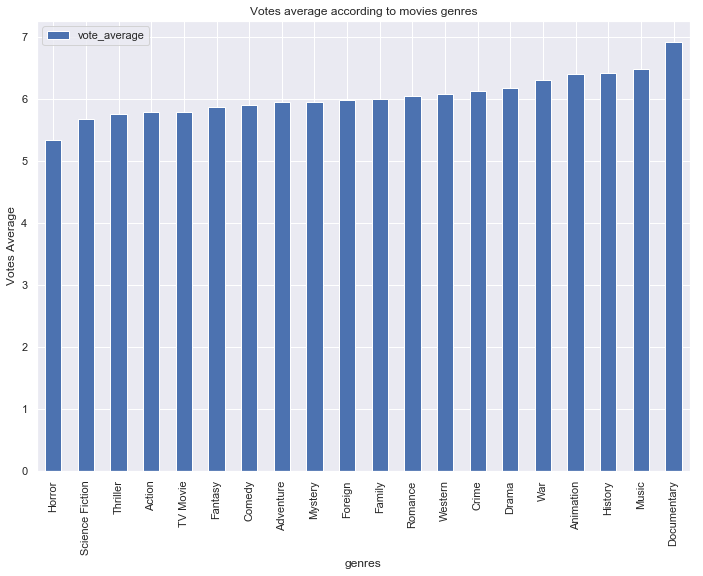

In [217]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
final_res.plot (kind = "bar");
plt.ylabel('Votes Average');
plt.title('Votes average according to movies genres');

> the graph above shows that documentary and music movies recorded the highest average of users votes in IMDP, in the contrary the horror and science finction movies 

### Is there any association between movies revenue and movies budget / users voting  in IMDB?

> the below scatter plot shows a positive correlation between users' votes in IMDB for each movie and movies revenue 

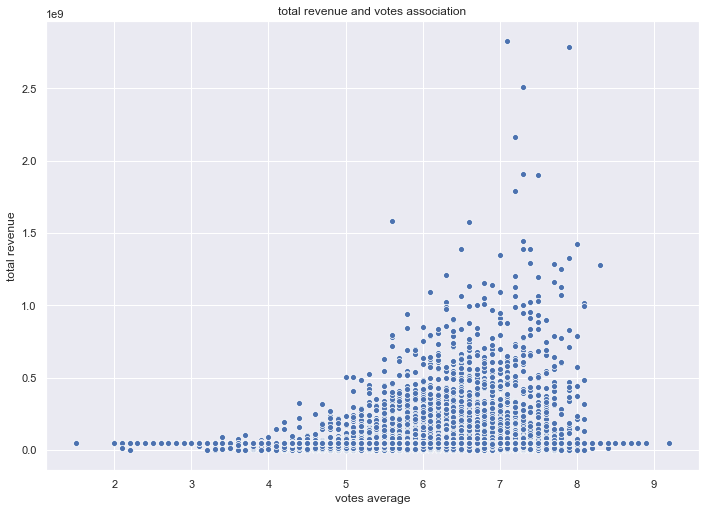

In [218]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.scatterplot(data=df, x="vote_average", y="revenue_adj");
plt.ylabel('total revenue');
plt.xlabel ( 'votes average');
plt.title ('total revenue and votes association');

In [190]:
np.corrcoef(df.vote_average, df.revenue_adj)

array([[1.        , 0.17663443],
       [0.17663443, 1.        ]])

> Below is the top 10 ranked movies in terms of revenue and votes average

In [170]:
top10_1 = df.sort_values(by = [ 'revenue_adj' , 'vote_average']  , ascending= False)[['original_title' , 'vote_average' , 'revenue_adj']].head(10)
top10_1

,original_title,vote_average,revenue_adj
1386,Avatar,7.1,2.827124e+09
1329,Star Wars,7.9,2.789712e+09
5231,Titanic,7.3,2.506406e+09
10594,The Exorcist,7.2,2.167325e+09
9806,Jaws,7.3,1.907006e+09
3,Star Wars: The Force Awakens,7.5,1.902723e+09
8889,E.T. the Extra-Terrestrial,7.2,1.791694e+09
8094,The Net,5.6,1.583050e+09
10110,One Hundred and One Dalmatians,6.6,1.574815e+09
4361,The Avengers,7.3,1.443191e+09


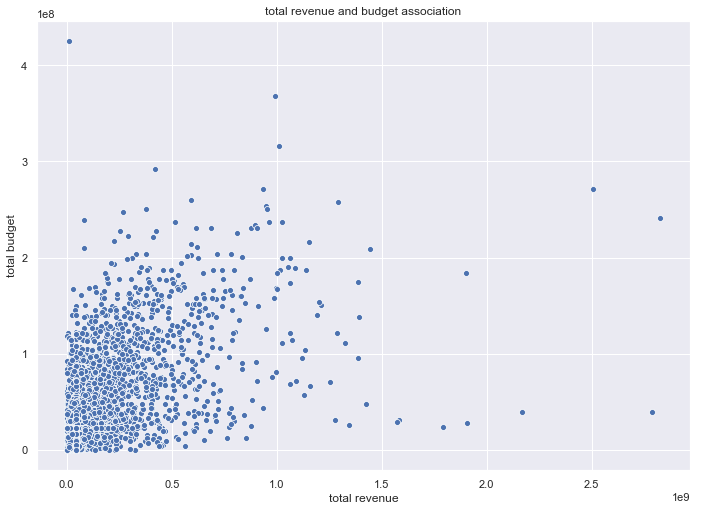

In [219]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.scatterplot(data=df,  x ="revenue_adj" ,y="budget_adj", );
plt.ylabel('total budget');
plt.xlabel ( 'total revenue');
plt.title ('total revenue and budget association');

In [191]:
np.corrcoef(df.budget_adj, df.revenue_adj)

array([[1.        , 0.59965217],
       [0.59965217, 1.        ]])

> the scatter plot above and the positive correlation coeficient  shows that the higher budget allocated for the movies, the higher revenue obtained with some exception, where there are some movies produced with a very high budget but didn't acheive the desired revenue. In the contrary, some movies achieved a very high level of revenue though they didn't have a reletively big budget

> the below is the top 10 ranked movies in terms of budget

In [174]:
top10_2 = df.sort_values(by = [ 'budget_adj' ]  , ascending= False)[['original_title' , 'budget_adj' ]].head(10)
top10_2

,original_title,budget_adj
2244,The Warrior's Way,4.250000e+08
3375,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
7387,Pirates of the Caribbean: At World's End,3.155006e+08
6570,Superman Returns,2.920507e+08
5231,Titanic,2.716921e+08
7394,Spider-Man 3,2.713305e+08
1929,Tangled,2.600000e+08
14,Avengers: Age of Ultron,2.575999e+08
1389,Harry Potter and the Half-Blood Prince,2.541001e+08
8089,Waterworld,2.504192e+08


In [175]:
pd.Series(list(set(top10_1.original_title).intersection(set(top10_2.original_title))))

0    Titanic
dtype: object

> it seems like `Titanic` is the only movied ranked in the top 10 movies in terms of budgeting, revenue, and users' voting in IMDB

### Which year recorded the highest / lowest level of revenue over the past 15 years?

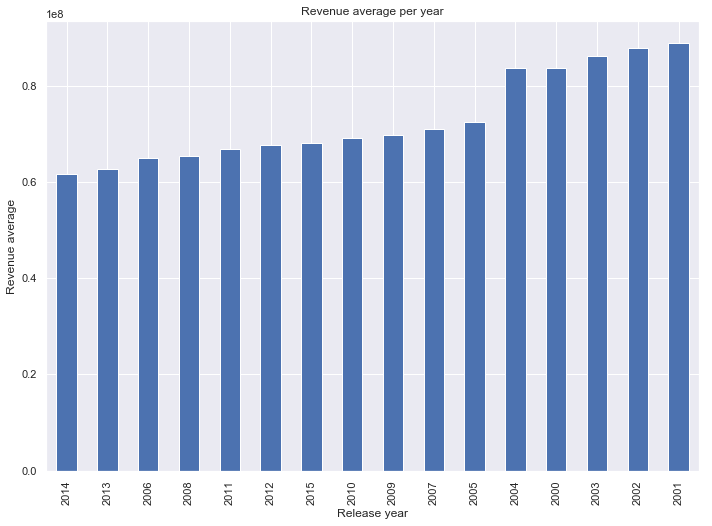

In [220]:
df_sub = df.loc[df.release_year >= 2000 , :]
df_sub_grp = df_sub.groupby(df_sub.release_year)['revenue_adj'].agg(np.mean)
df_sub_grp.sort_values().plot (kind = 'bar');
plt.xlabel('Release year');
plt.ylabel('Revenue average');
plt.title('Revenue average per year');

> the highest level of revenue has been obtained in the period between 2000 and 2004

<a id='conclusions'></a>
## Conclusions

> 1) The documentary and music movies recorded the highest average of users votes in IMDP, in the contrary the horror and science finction movies

> 2) The higher budget allocated for the movies, the higher revenue obtained with some exception, where there are some movies produced with a very high budget but didn't acheive the desired revenue. In the contrary, some movies achieved a very high level of revenue though they didn't have a reletively big budget.

> 3) **Avatar, Star Wars and Titanic** are ranked as the top movies in IMDP in terms of users votes and revenue.

> 4) **The Warrior's Way**, **Pirates of the Caribbean: On Stranger Tides**, and **Pirates of the Caribbean: At World's End** are ranked as the top movies in IMDP in terms of budgeting.

> 5) the highest level of revenue has been obtained in the period between **2000 and 2004**

### Limitations

> We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.


> Replacing zero value in some variables of our interest with the mean / median might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.